In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from os.path import join
print(os.listdir("../input"))
path = "../input"

# Any results you write to the current directory are saved as output.

['survey_results_schema.csv', 'survey_results_public.csv']


## Reading the data

In [2]:
df = pd.read_csv(join(path, 'survey_results_public.csv'), low_memory=False)

In [3]:
df.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,...,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,...,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,3.0,1.0,...,4.0,6.0,7.0,2.0,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per month or weekly,Yes,A few times per month or weekly,Yes,"No, I have one but it's out of date",7,Yes,A little bit interested,A little bit interested,A little bit interested,A little bit interested,A little bit interested,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder

# Helping functions

In [4]:
def plot_categorical_count(df, column, title='', limit=2, xtick_rotation='horizontal'):
    column_count = df[column].value_counts()[:limit]
    
    fig = plt.figure(figsize=(14, 8))
    sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
    sns.despine(left=True)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=xtick_rotation)

# Top 10 Countries 

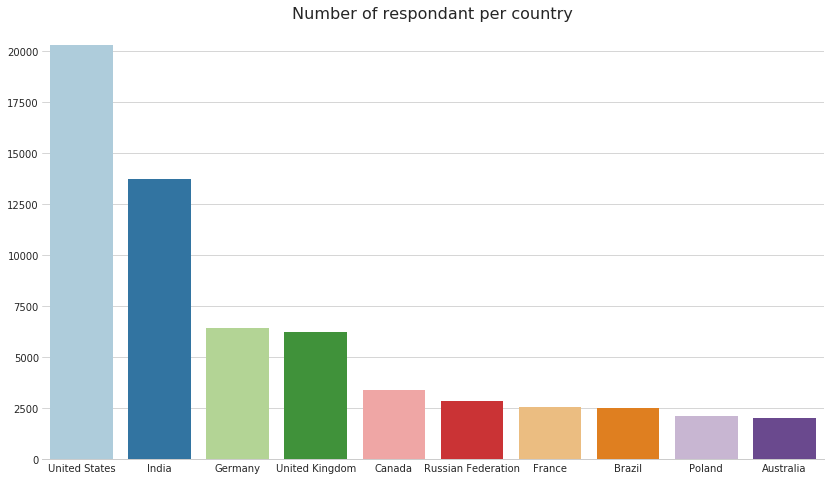

In [5]:
plot_categorical_count(df, column='Country', title='Number of respondant per country', limit=10)

> We can see that the USA is the country with the most respondant

# Hobbiest or Not

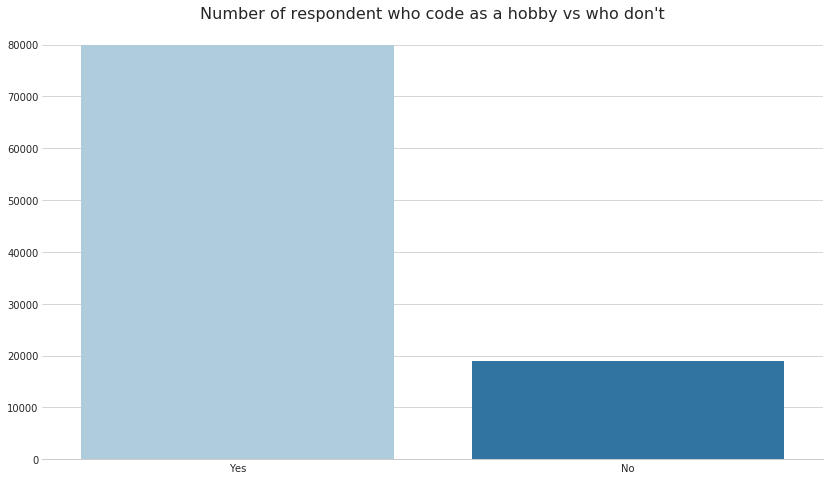

In [6]:
plot_categorical_count(df, 'Hobby', title='Number of respondent who code as a hobby vs who don\'t')

> Majority of the respondants code as a hobby.

# Open Source contributour

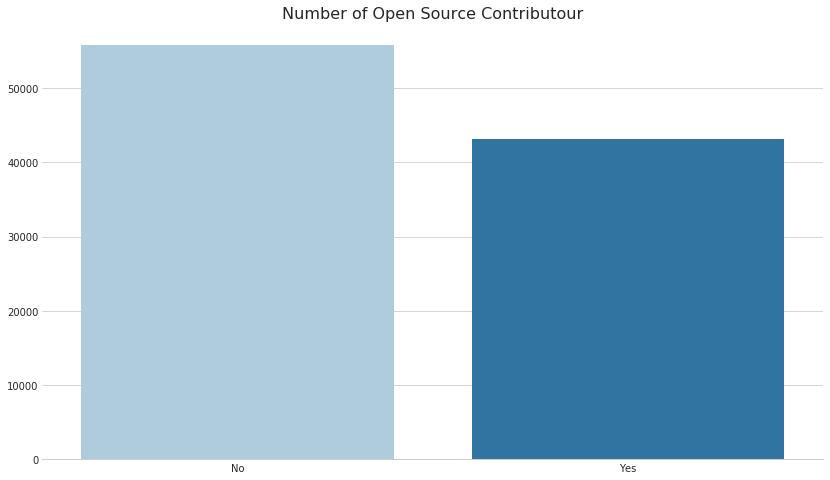

In [7]:
plot_categorical_count(df, 'OpenSource', title='Number of Open Source Contributour')


> The number of respondants who dpn't contribute to Open Source is higher than those who don't 

# Does coding as a hobby affect contributing to Open Source ??

Text(0.5,1,'Number of Open Source Contributour')

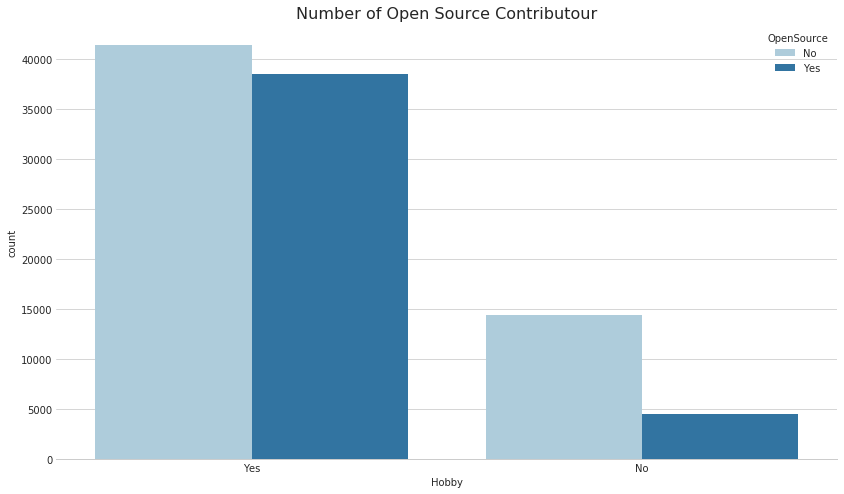

In [8]:
open_source_count = df['OpenSource'].value_counts()

plt.figure(figsize=(14, 8))
sns.countplot(df['Hobby'], palette='Paired', hue=df['OpenSource'])
sns.despine(left=True)
plt.title('Number of Open Source Contributour', fontsize=16)

> Thse who code as a hobby are more likely to contribute to Open source

# Student or Not ?

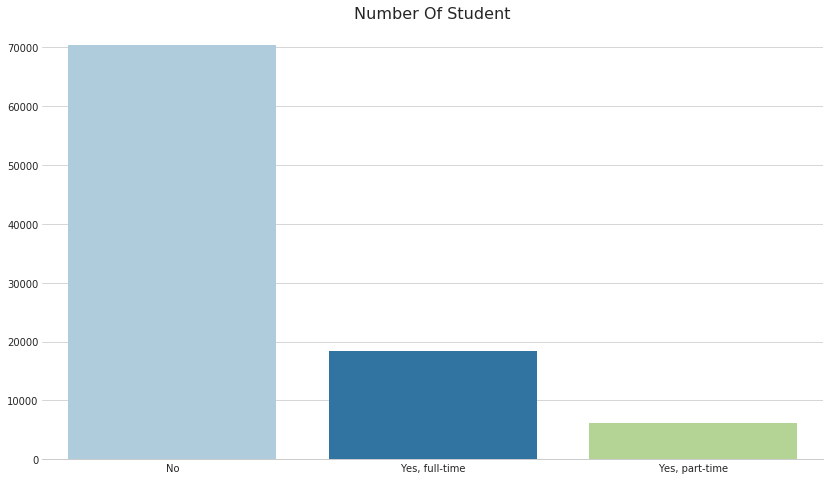

In [9]:
plot_categorical_count(df, 'Student', title='Number Of Student', limit=3)

 > Majority of respondants were not student.

# Employement Status

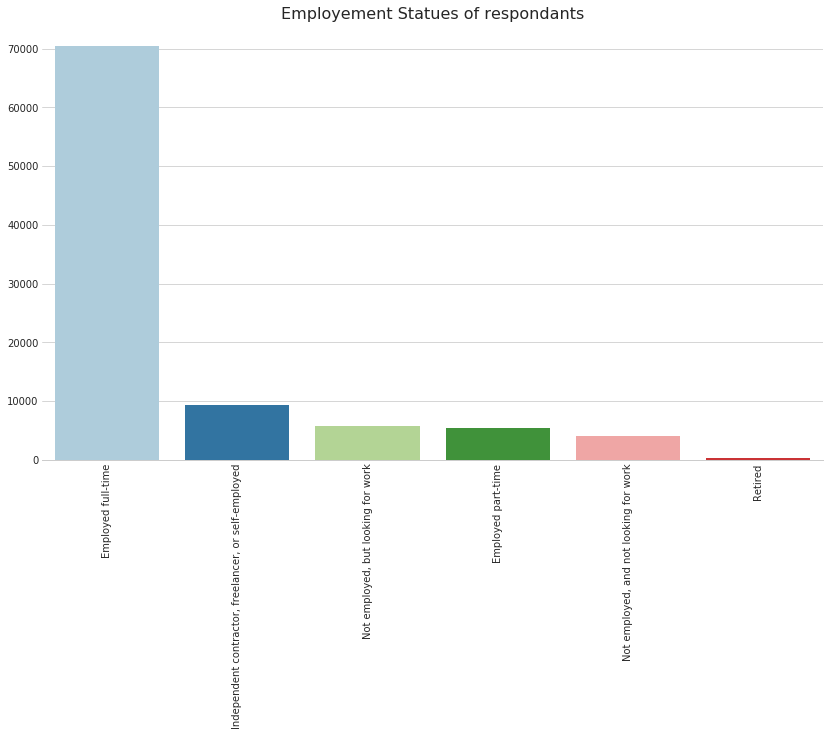

In [10]:
plot_categorical_count(df, 'Employment', title='Employement Statues of respondants', limit=6, xtick_rotation='vertical')

> Majority of respondants are working full time

# Male vs Female

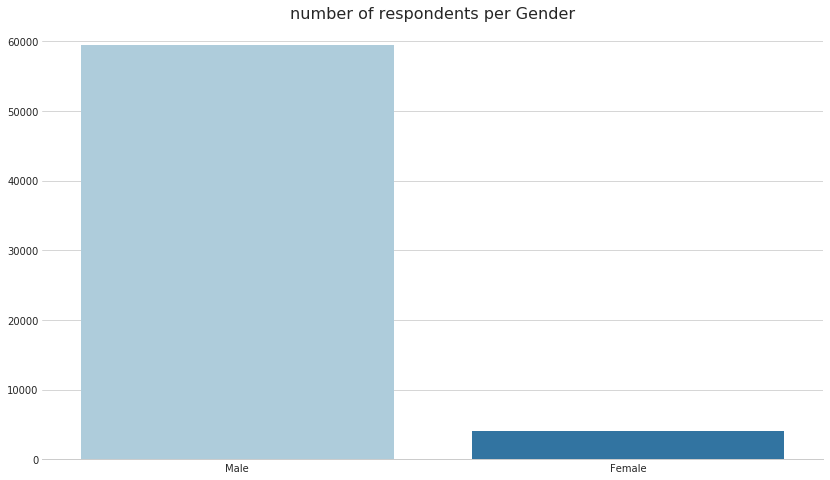

In [11]:
plot_categorical_count(df, 'Gender', title='number of respondents per Gender')

> We see that the majority of respondents were male

# When do developpers wake up ?

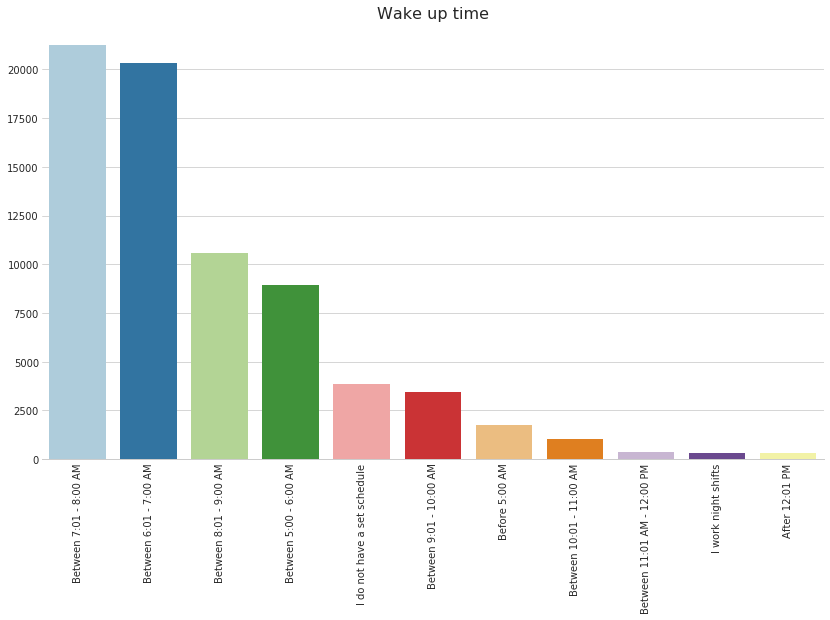

In [12]:
plot_categorical_count(df, 'WakeTime', title='Wake up time', limit=11, xtick_rotation='vertical')

> We can see that the majority of developpers wake up between 6:01 - 8:00 Am
> There is also a good amount of developper who wake up between 8:01 - 9:00 AM and between 5:00 - 6:00

# Respondents majors

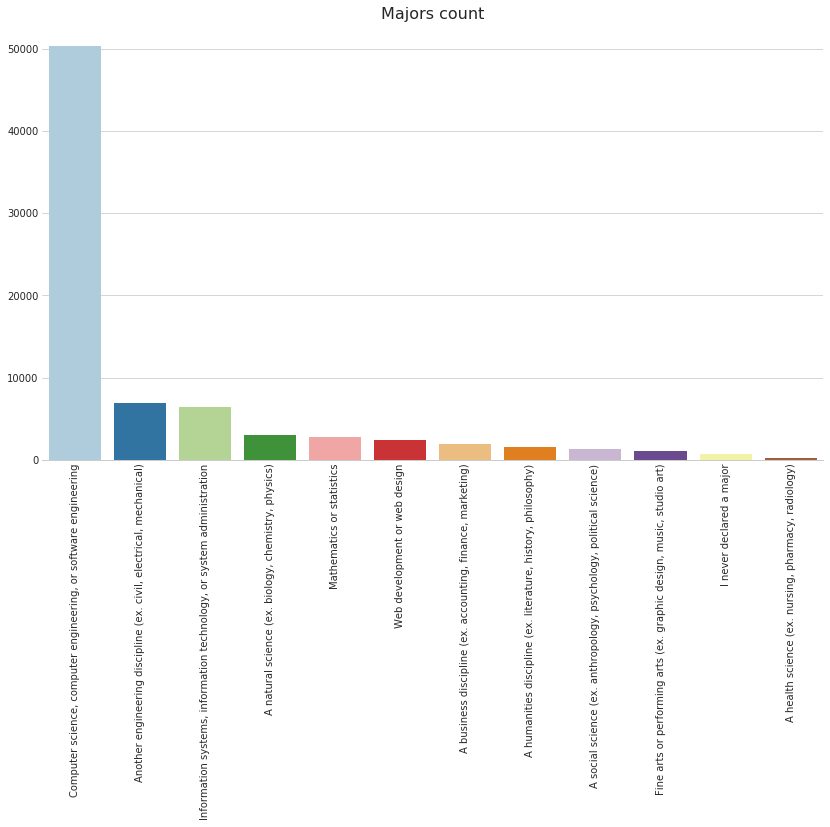

In [13]:
plot_categorical_count(df, 'UndergradMajor', 'Majors count', limit=100, xtick_rotation='vertical')

> As expected, the computer-related majors are dominating in the Stack overflow community

# Professional life in the Top 10 Countries
* In this section, we'll get a deeper look at the professional life in the top 10 countries participating in the survey

# Job Satisfaction in the top 10 countries

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

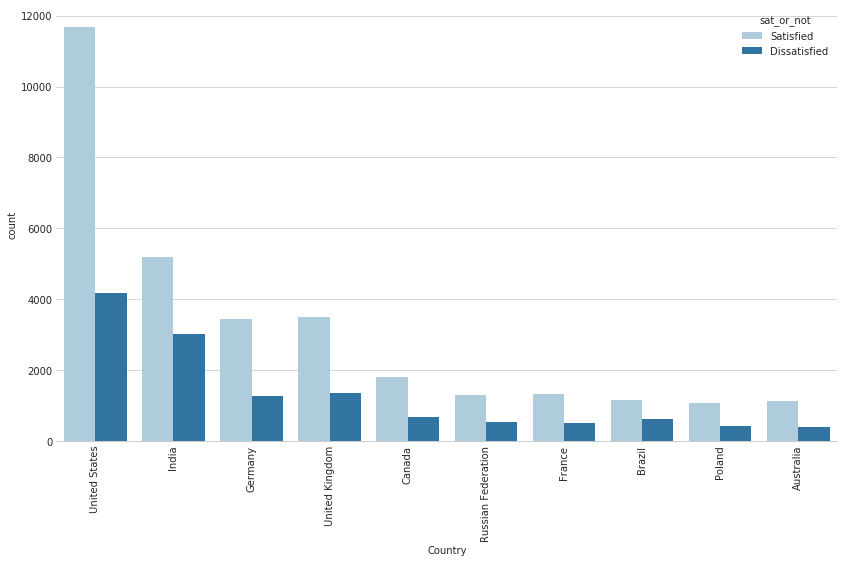

In [16]:
def st_not(row):
    if 'dissatisfied' in row:
        return 'Dissatisfied'
    return 'Satisfied'

df['sat_or_not'] = df['JobSatisfaction'].dropna().map(st_not)
#sat = df[np.logical_or(np.logical_or(df['JobSatisfaction'] == 'Moderately satisfied', df['JobSatisfaction'] == 'Extremely satisfied'), df['JobSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Country', hue='sat_or_not', palette='Paired', order=df['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

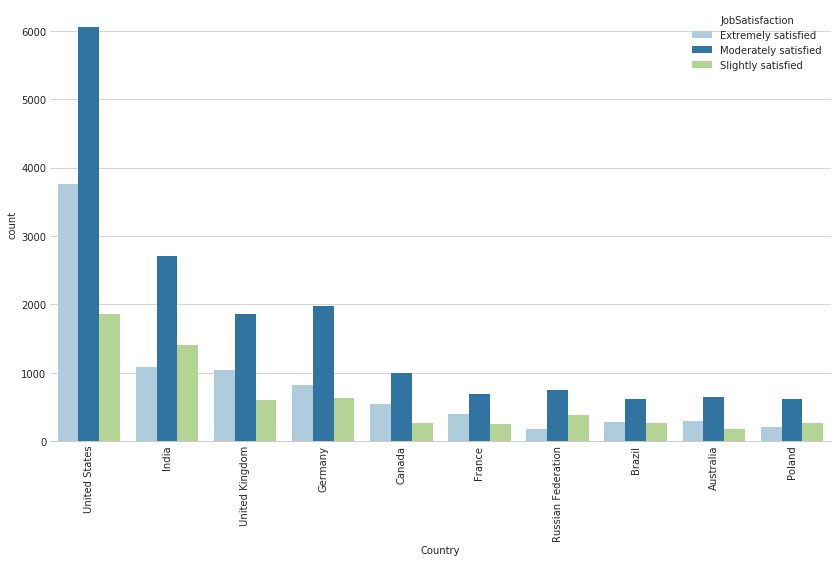

In [17]:
df['JobSatisfaction'].value_counts()
sat = df[np.logical_or(np.logical_or(df['JobSatisfaction'] == 'Moderately satisfied', df['JobSatisfaction'] == 'Extremely satisfied'), df['JobSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='JobSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

> In the Top 10 countires, Developpers are moderatly satisfied with their jobs

# Career Satisfaction

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

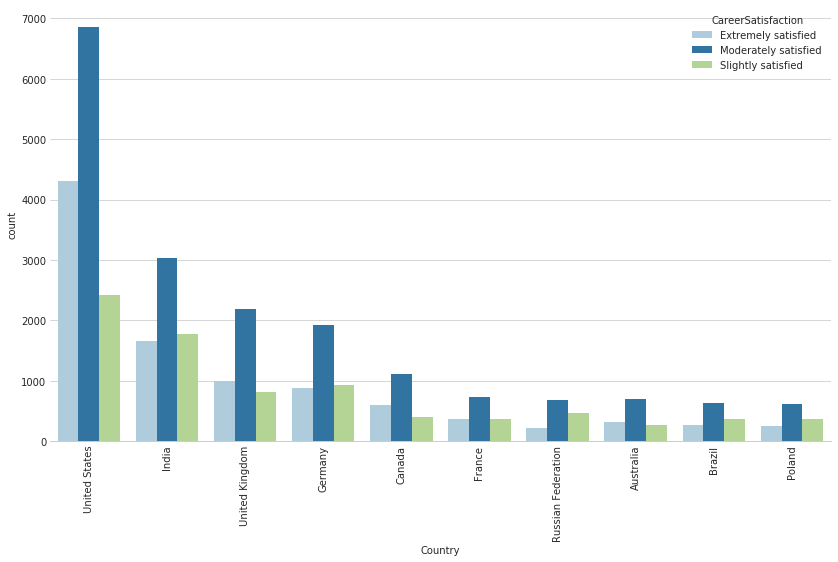

In [19]:
df['CareerSatisfaction'].value_counts()
sat = df[np.logical_or(np.logical_or(df['CareerSatisfaction'] == 'Moderately satisfied', df['CareerSatisfaction'] == 'Extremely satisfied'), df['CareerSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='CareerSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

# Personal life in the top 10 countries
* In this section, we'll try to get a deeper look at the developers peronal life in the top 10 countries taking the survey

# Wake up time in the top 10 countries

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

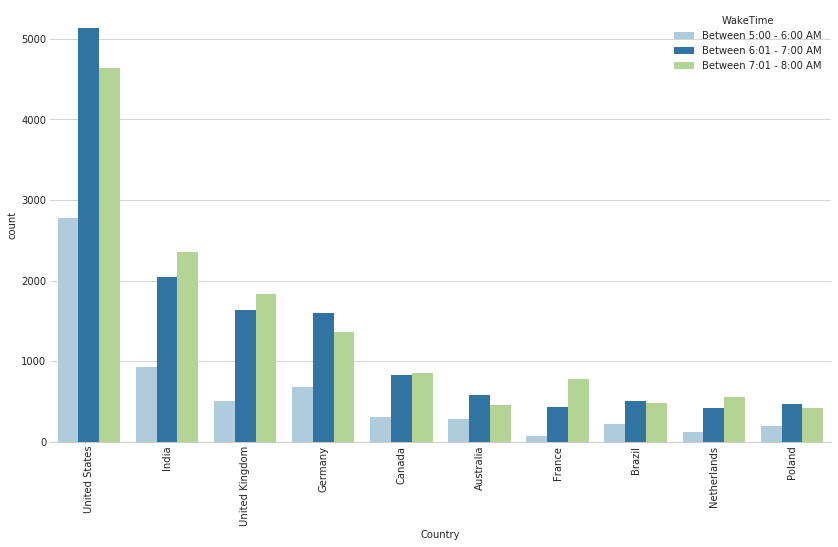

In [20]:
earlybirds = df[np.logical_or(np.logical_or(df['WakeTime'] == 'Between 7:01 - 8:00 AM', df['WakeTime'] == 'Between 6:01 - 7:00 AM'), df['WakeTime'] == 'Between 5:00 - 6:00 AM')] 

plt.figure(figsize=(14, 8))
sns.countplot(data=earlybirds, x='Country', hue='WakeTime', palette='Paired', order=earlybirds['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')


> We can see that most developpers in the top 10 countries wake up between 6 AM and 8 AM

# Hours spent on the computer

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

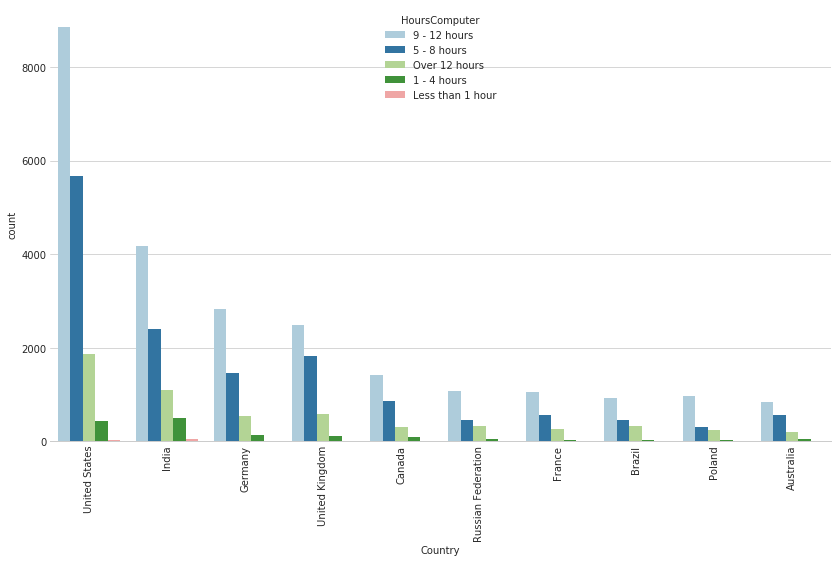

In [21]:
sat = df
plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='HoursComputer', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

> Most developpers spent between 5 and 12 hours on the computer.

# Hours outside

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

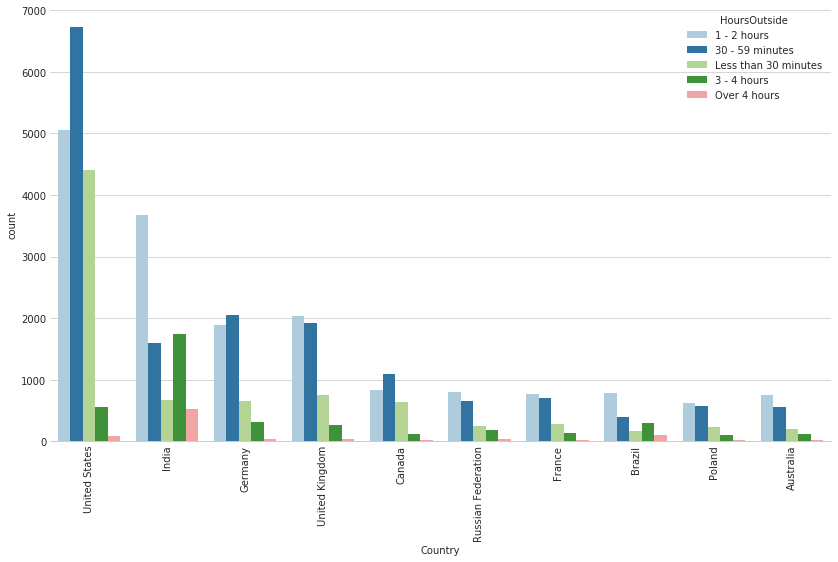

In [22]:
sat = df
plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='HoursOutside', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

> * Except for india, in the other top 9 countries, most developpers are spending less than 2 hours outside.
> * In india, We can see that there is a high number of developpers who spent 3 to 4 hours outside, event the number of those who spent more than 4 hours outside is high if we compare it to the other countries.

# Who's skipping their meals ?

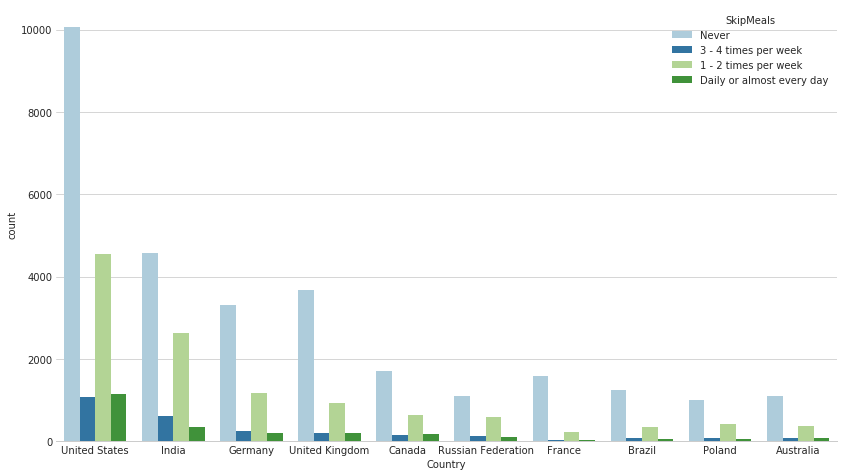

In [23]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x = 'Country', hue='SkipMeals', palette='Paired', order=df['Country'].value_counts()[:10].index)
sns.despine(left=True)

> We can see the same pattern fot the top 10 countries, in which the majority of developpers never skip any meals

# Excercicing

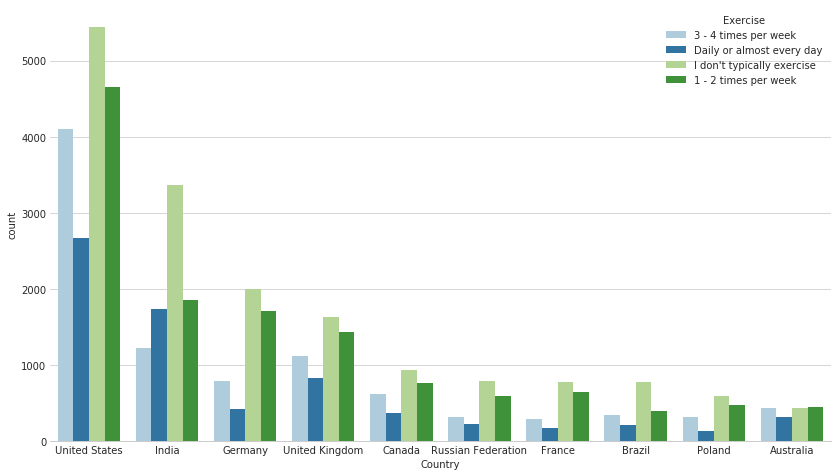

In [24]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Country', hue='Exercise', palette='Paired', order=df['Country'].value_counts()[:10].index)
sns.despine(left=True)

> * Developpers do not typically exercice, or are excercicing for 1-2 times a week which is not enough.